**Лекция 8**

# Игра

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

In [4]:
# from PIL import Image
# img = Image.open("pix/Game/07.png").convert('L')
# img.save('pix/Game/07.png')

In [5]:
# Reading the image
img = plt.imread("pix/Game/01.png")
print(np.shape(img))

(803, 800)


In [6]:
# SVD 
U, s, Vt = LA.svd(img)
Sigma = np.diag(s)
print('Количество сингулярных чисел:', len(s))
k = 5
print(f'Значения первых {k}: {s[:k]}')

S_s = sum(s**2)
eds = list(map(lambda i: (sum(s[i:]**2)) / S_s, range(len(s))))
# eds = list(map(lambda i: s[i] / s[0], range(len(s))))

Количество сингулярных чисел: 800
Значения первых 5: [438.3949    156.19589    10.952887    8.350259    5.0163136]


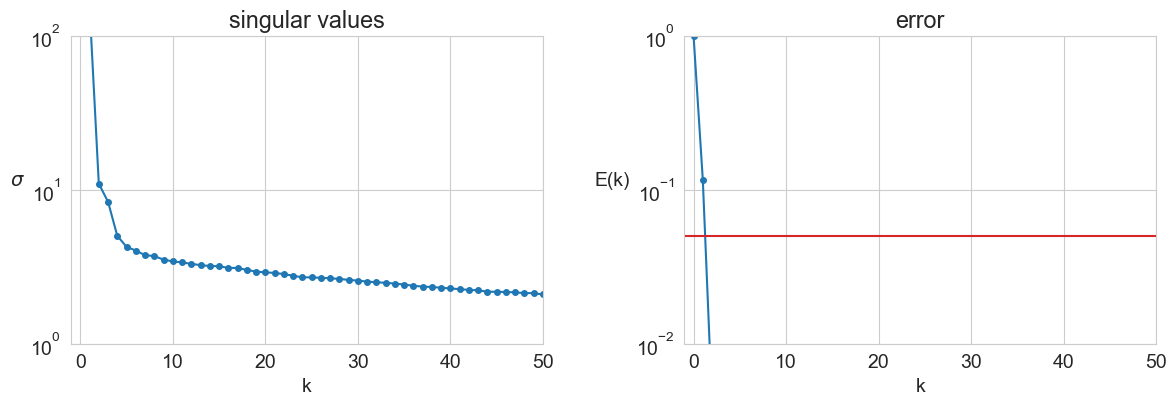

In [7]:
eps = 0.05
seaborn.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(s, 'o-')
ax1.set_title('singular values')
ax1.set_xlim(-1, 50)
ax1.set_yscale('log')
ax1.set_ylim(1e0, 1e2)
ax1.set_xlabel('k')
ax1.set_ylabel('$\sigma$', rotation='horizontal', ha='right')

ax2.plot(eds, 'o-')
ax2.axhline(y=eps, c=cm(3))
ax2.set_title('error')
ax2.set_xlim(-1, 50)
ax2.set_yscale('log')
ax2.set_ylim(1e-2, 1e0)
ax2.set_xlabel('k')
ax2.set_ylabel('E(k)', rotation='horizontal', ha='right')

plt.show()

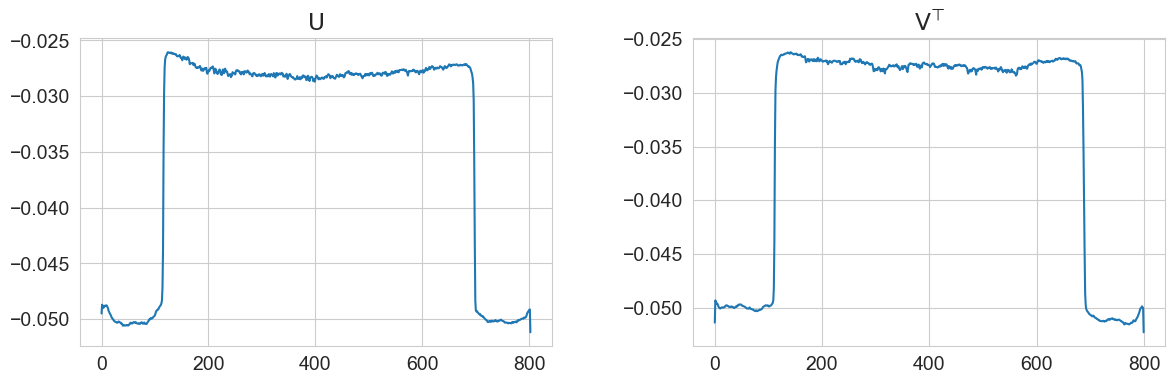

In [8]:
seaborn.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(U[:, :1])
ax1.set_title('$\mathrm{U}$')

ax2.plot(Vt[:1, :].T)
ax2.set_title('$\mathrm{V^\\top}$')

plt.show()

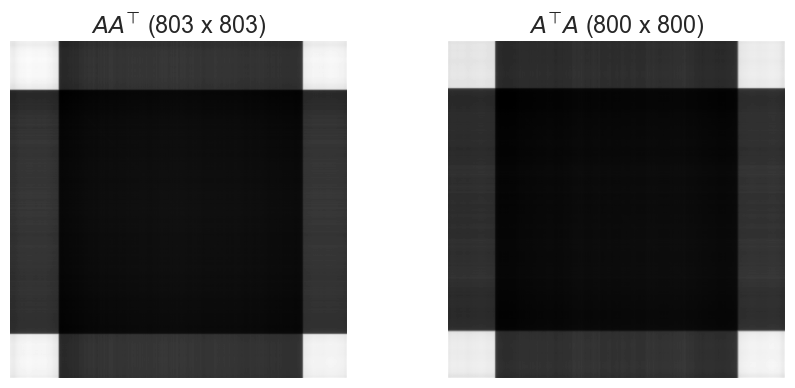

In [9]:
seaborn.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

Cor_1 = img@img.T
Cor_2 = img.T@img

axes[0].imshow(Cor_1, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title(f'$AA^\\top$ ({Cor_1.shape[0]} x {Cor_1.shape[1]})')

axes[1].imshow(Cor_2, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title(f'$A^\\top A$ ({Cor_2.shape[0]} x {Cor_2.shape[1]})')

plt.show()

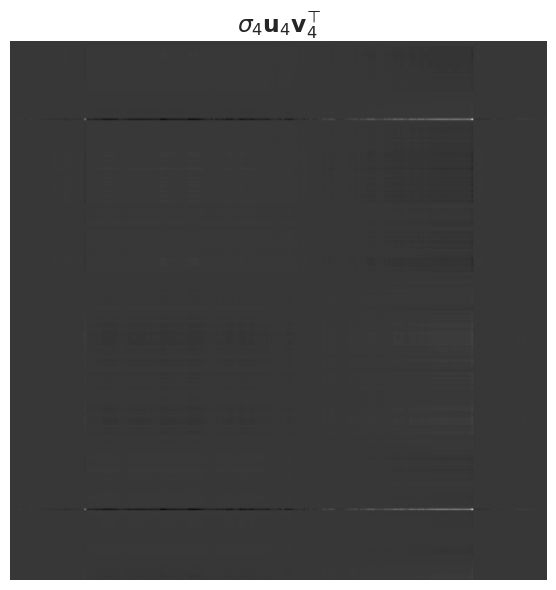

In [10]:
seaborn.set_style("white")
fig, axes = plt.subplots(1, 1, figsize=(7,7))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

i = 4
img_i = s[i-1] * U[:,i-1].reshape(-1,1) @ Vt[i-1,:].reshape(1,-1)
axes.imshow(img_i, cmap='gray')
axes.set_axis_off()
axes.set_title(f"$\sigma_{i} \mathbf{{u}}_{i} \mathbf{{v}}_{i}^\\top$")
plt.show()

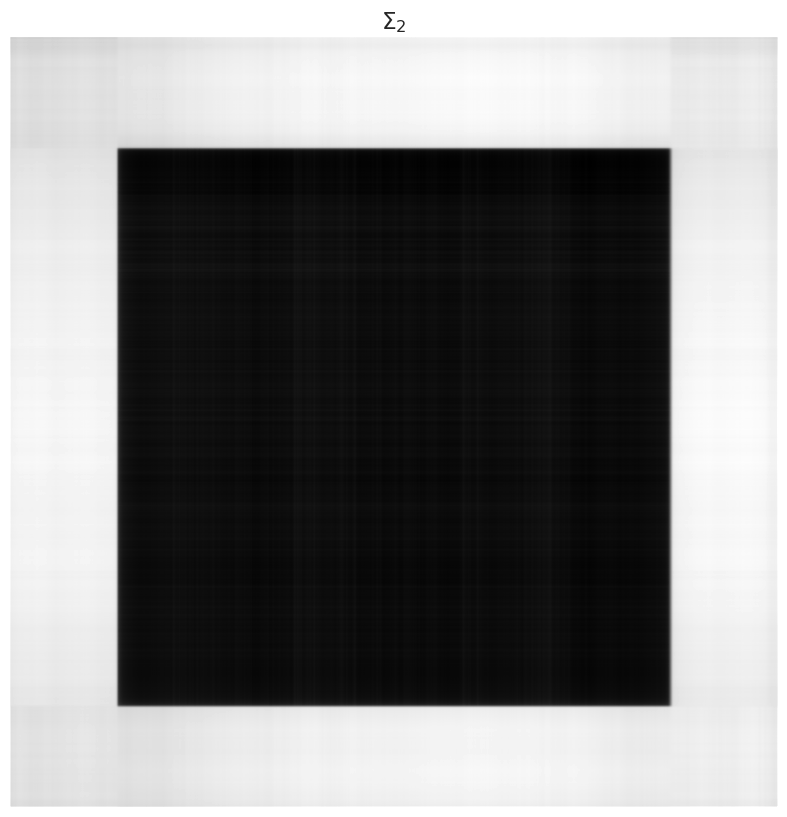

In [11]:
seaborn.set_style("white")
fig, axes = plt.subplots(1, 1, figsize=(10,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

k = 2
img_k = U[:, :k] @ Sigma[:k, :k] @ Vt[:k, :]
axes.imshow(img_k, cmap='gray')
axes.set_axis_off()
axes.set_title(f"$\Sigma_{{{k}}}$")
    
plt.show()

---